# Support Vector Machine Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Import the admissions data set (admissions.csv).

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [3]:
data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


### Group the data by the Admitted field and compute the average values for each field.

In [4]:
data.groupby(by=['Admitted']).mean()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,307.013072,102.588235,2.261438,2.741830,2.875817,8.087974,0.248366
1,322.874494,110.396761,3.599190,3.807692,3.809717,8.915425,0.732794


### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [5]:
data.Admitted.value_counts()

1    247
0    153
Name: Admitted, dtype: int64

In [6]:
# data.shape
print(f'{round(247/400*100, 2)}% of students were admitted')
print(f'{153/400*100}% of students were not admitted')

61.75% of students were admitted
38.25% of students were not admitted


### What percent of students with research experience were admitted?

In [7]:
res_admit = data[(data['Research']==1) & (data['Admitted'] == 1)].shape[0]
res_total = data[(data['Research']==1)].shape[0]
print(f'{round(res_admit/res_total * 100, 2)}% of students with research experience were admitted')

82.65% of students with research experience were admitted


### What percent of students admitted had research experience?

In [8]:
stu_total = data.shape[0]
res_total = data[(data['Research']==1)].shape[0]
print(f'{round(res_total/stu_total * 100, 2)}% of students had research experience')

54.75% of students had research experience


### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

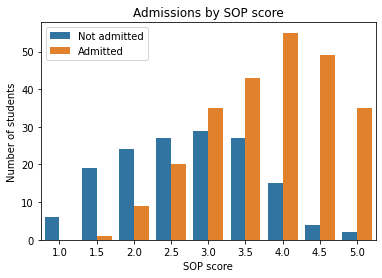

In [9]:
ax = sns.countplot(x='SOP', hue='Admitted', data=data)
ax.legend(['Not admitted', 'Admitted'], loc='upper left')
plt.ylabel('Number of students')
plt.xlabel('SOP score')
plt.title('Admissions by SOP score')
plt.show()

### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

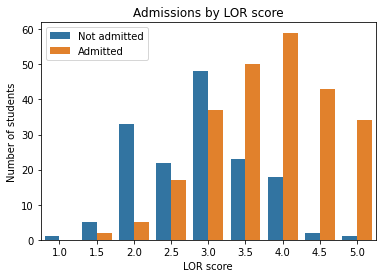

In [10]:
ax = sns.countplot(x='LOR', hue='Admitted', data=data)
ax.legend(['Not admitted', 'Admitted'], loc='upper left')
plt.ylabel('Number of students')
plt.xlabel('LOR score')
plt.title('Admissions by LOR score')
plt.show()

### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

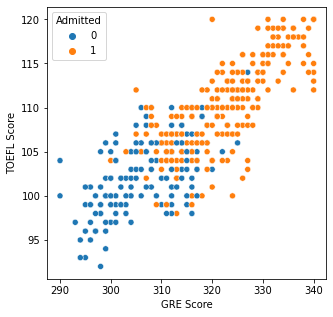

In [11]:
fig, ax = plt.subplots(figsize = (5,5))
sns.scatterplot(x ='GRE', y = 'TOEFL', hue='Admitted', ax=ax, data=data)
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.show()

### Generate a scatter plot where the axes are GPA and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

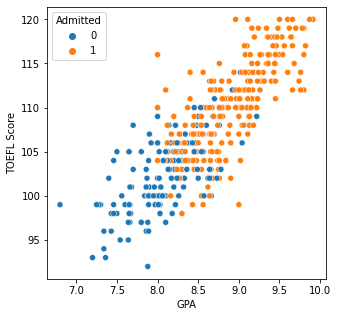

In [12]:
fig, ax = plt.subplots(figsize = (5,5))
sns.scatterplot(x ='GPA', y = 'TOEFL', hue='Admitted', ax=ax, data=data)
plt.xlabel('GPA')
plt.ylabel('TOEFL Score')
plt.show()

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

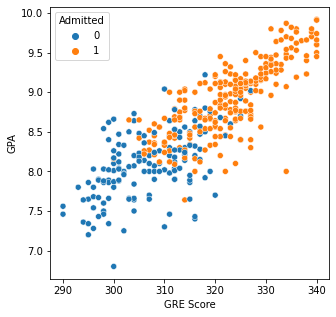

In [13]:
fig, ax = plt.subplots(figsize = (5,5))
sns.scatterplot(x ='GRE', y = 'GPA', hue='Admitted', ax=ax, data=data)
plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.show()

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop('Admitted', axis=1)
y = data['Admitted']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
print('Training score: ', svm.score(X_train, y_train))
print('Test score: ', svm.score(X_test, y_test))

Training score:  0.86875
Test score:  0.875


### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [17]:
from sklearn.metrics import classification_report
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_rep = classification_report(y_train, y_train_pred)
test_rep = classification_report(y_test, y_test_pred)

print(train_rep)
print(test_rep)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       127
           1       0.89      0.89      0.89       193

    accuracy                           0.87       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.87      0.87      0.87       320

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.91      0.91      0.91        54

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80

